In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('placement.csv')

In [17]:
df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15312\3853201202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15312\3853201202.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


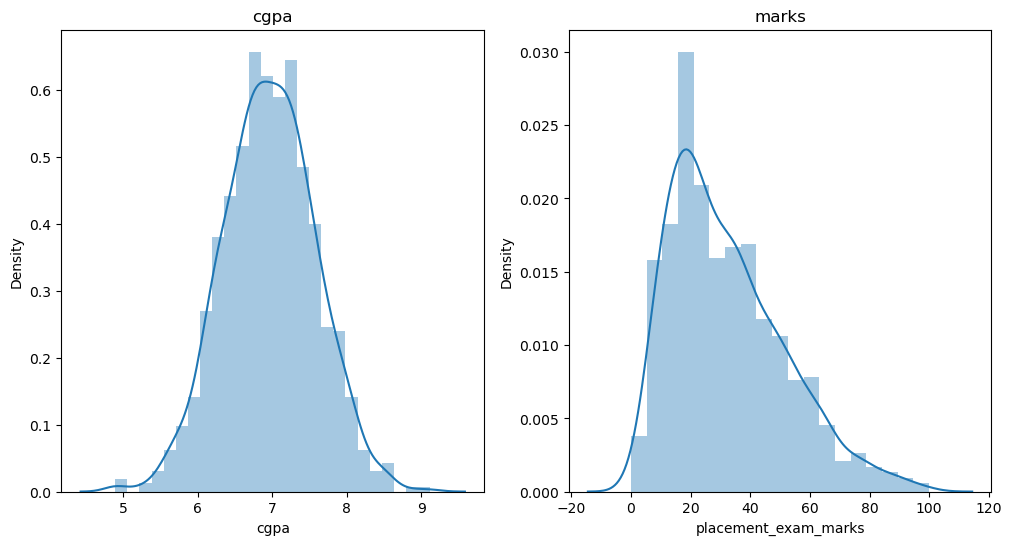

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(df['cgpa'])
plt.title('cgpa')

plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'])
plt.title("marks")

plt.show()

In [19]:
print('mean of cgpa:', df['cgpa'].mean())
print('standard deviation of cgpa:', df['cgpa'].std())
print('max of cgpa:', df['cgpa'].max())
print("min of cgpa:", df['cgpa'].min())

mean of cgpa: 6.96124
standard deviation of cgpa: 0.6158978751323894
max of cgpa: 9.12
min of cgpa: 4.89


In [20]:
# print the highest value and lowest value
print("highest value of cgpa:", df['cgpa'].mean() + 3 * df['cgpa'].std())
print("lowest value of cgpa:", df['cgpa'].mean() - 3 * df['cgpa'].std())

highest value of cgpa: 8.808933625397168
lowest value of cgpa: 5.113546374602832


In [21]:
# outlier detection 
df[(df['cgpa'] < 5.11) | (df['cgpa'] > 8.80)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimm

In [22]:
new_df = df[(df['cgpa'] >= 5.11) & (df['cgpa'] <= 8.80)]

In [24]:
new_df.shape

(995, 3)

In [25]:
# using z score to handle the outlier
df['z_score'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [26]:
df[df['z_score'] > 3], df[df['z_score'] < -3]

(     cgpa  placement_exam_marks  placed   z_score
 995  8.87                  44.0       1  3.099150
 996  9.12                  65.0       1  3.505062,
      cgpa  placement_exam_marks  placed   z_score
 485  4.92                  44.0       1 -3.314251
 997  4.89                  34.0       0 -3.362960
 999  4.90                  10.0       1 -3.346724)

In [28]:
df[(df['z_score'] > 3) | (df['z_score'] < -3)]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [30]:
new_df2 = df[(df['z_score'] < 3) & (df['z_score'] > -3)]
new_df2.shape

(995, 4)

## Capping 

In [31]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

In [32]:
df['cgpa'] = np.where(df['cgpa'] > upper_limit, upper_limit,
np.where(df['cgpa'] < lower_limit, lower_limit, df['cgpa']))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15312\1750969075.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['cgpa'], hist=False)


<Axes: ylabel='Density'>

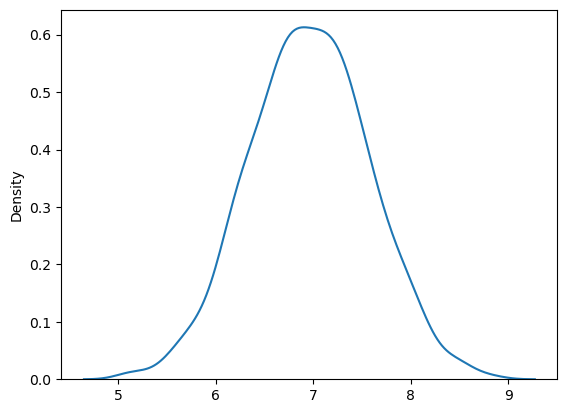

In [38]:
sns.distplot(x=df['cgpa'], hist=False)